In [1]:
import pandas as pd 
import sys 
import os 
import importlib 
import talib as ta
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import numpy as np
path = 'C:/Users/mulle/Documents/iCloudDrive/Documents/19. GITHUB/Crypto/data'

os.chdir(path)

# Import the module
sys.path.append('P:/6. DSMA/99. Thesis/Github/thesis/scripts')
import pipeline_crypto_prices
from pipeline_crypto_prices import get_prices
import camel
import sentiment_analyzer
importlib.reload(pipeline_crypto_prices)
importlib.reload(camel)
importlib.reload(sentiment_analyzer)

[scatterd] >WARNING> From C:\Users\mulle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\losses.py:2976: The name tf.losses.sparse_softmax_cross_entropy is deprecated. Please use tf.compat.v1.losses.sparse_softmax_cross_entropy instead.



<module 'sentiment_analyzer' from 'P:\\6. DSMA/99. Thesis/Github/thesis/scripts\\sentiment_analyzer.py'>

In [20]:
btc = get_prices(start_date='2018-01-01')
snp = get_prices('SNP', start_date='2018-01-01')
gold = get_prices('Gold', start_date='2018-01-01')
sol = get_prices('SOL-USD', start_date='2018-01-01')
ada = get_prices('ADA-USD', start_date='2018-01-01')
eth = get_prices('ETH-USD', start_date='2018-01-01')

P:\6. DSMA/99. Thesis/Github/thesis/scripts\pipeline_crypto_prices.py:156: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Returns'] = df['Close'].pct_change()


Data for BTC-USD from 2018-01-01 to 2024-07-15 has been downloaded successfully
Data for SNP from 2018-01-01 to 2024-07-15 has been downloaded successfully


P:\6. DSMA/99. Thesis/Github/thesis/scripts\pipeline_crypto_prices.py:156: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Returns'] = df['Close'].pct_change()
P:\6. DSMA/99. Thesis/Github/thesis/scripts\pipeline_crypto_prices.py:156: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Returns'] = df['Close'].pct_change()


Data for Gold from 2018-01-01 to 2024-07-15 has been downloaded successfully
Data for SOL-USD from 2018-01-01 to 2024-07-15 has been downloaded successfully
Data for ADA-USD from 2018-01-01 to 2024-07-15 has been downloaded successfully
Data for ETH-USD from 2018-01-01 to 2024-07-15 has been downloaded successfully


P:\6. DSMA/99. Thesis/Github/thesis/scripts\pipeline_crypto_prices.py:156: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Returns'] = df['Close'].pct_change()
P:\6. DSMA/99. Thesis/Github/thesis/scripts\pipeline_crypto_prices.py:156: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Returns'] = df['Close'].pct_change()


### Making Technical Indicators and Other 

In [21]:

btc_t = btc.drop('Adj Close', axis=1).copy()
snp_t = snp.drop('Adj Close', axis=1).copy()
sol_t = sol.drop('Adj Close', axis=1).copy()
gold_t = gold.drop('Adj Close', axis=1).copy()
gold_t = gold_t.fillna(method='ffill')
ada_t = ada.drop('Adj Close', axis=1).copy()
eth_t = eth.drop('Adj Close', axis=1).copy()
# 1. Overlay
def camel_ta(df, overlay=True, momentum=True, volume=True):
    df = df.copy()
    if overlay:
            df['bb_upper'], df['bb_middle'], df['bb_lower'] = ta.BBANDS(df.Close, 20, 2)
            df['SAR'] = ta.SAR(df.High, df.Low, acceleration=0.02, maximum=0.2)
            df['t3'] = ta.T3(df.Close, 5, 0.7)
            df['21MA'] = ta.MA(df.Close, 21)
            df['200MA'] = ta.MA(df.Close, 200)
   
    if momentum:
            df['RSI'] = ta.RSI(df.Close, 14)
            df['Stochastic'] = ta.STOCH(df.High, df.Low, df.Close, 14, 14, 0, 3, 0.5)[1]
            df['CCI'] = ta.CCI(df.High, df.Low, df.Close, 14)
            df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = ta.MACD(df.Close, 12, 26, 9)
            df['ROC'] = ta.ROC(df.Close, 12)

    if volume:
            df['OBV'] = ta.OBV(df.Close, df.Volume)
            df['CMF'] = ta.ADOSC(df.High, df.Low, df.Close, df.Volume, 21)

    return df

btc_ta = camel_ta(btc_t)
sol_ta = camel_ta(sol_t)
snp_ta = camel_ta(snp_t)
gold_ta = camel_ta(gold_t)
ada_ta = camel_ta(ada_t)
eth_ta = camel_ta(eth_t)

C:\Users\mulle\AppData\Local\Temp\ipykernel_14780\3998668473.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gold_t = gold_t.fillna(method='ffill')


In [127]:
# Make dataframe for all chart recognition 

charts = pd.DataFrame()
charts['Date'] = btc.Date
charts['CDL2CROWS'] = ta.CDL2CROWS(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDL3BLACKCROWS'] = ta.CDL3BLACKCROWS(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDL3INSIDE'] = ta.CDL3INSIDE(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDL3LINESTRIKE'] = ta.CDL3LINESTRIKE(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDL3OUTSIDE'] = ta.CDL3OUTSIDE(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDL3STARSINSOUTH'] = ta.CDL3STARSINSOUTH(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDL3WHITESOLDIERS'] = ta.CDL3WHITESOLDIERS(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLABANDONEDBABY'] = ta.CDLABANDONEDBABY(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLADVANCEBLOCK'] = ta.CDLADVANCEBLOCK(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLBELTHOLD'] = ta.CDLBELTHOLD(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLBREAKAWAY'] = ta.CDLBREAKAWAY(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLCLOSINGMARUBOZU'] = ta.CDLCLOSINGMARUBOZU(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLCONCEALBABYSWALL'] = ta.CDLCONCEALBABYSWALL(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLCOUNTERATTACK'] = ta.CDLCOUNTERATTACK(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLDARKCLOUDCOVER'] = ta.CDLDARKCLOUDCOVER(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLDOJI'] = ta.CDLDOJI(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLDOJISTAR'] = ta.CDLDOJISTAR(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLDRAGONFLYDOJI'] = ta.CDLDRAGONFLYDOJI(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLENGULFING'] = ta.CDLENGULFING(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLEVENINGDOJISTAR'] = ta.CDLEVENINGDOJISTAR(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLEVENINGSTAR'] = ta.CDLEVENINGSTAR(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLGAPSIDESIDEWHITE'] = ta.CDLGAPSIDESIDEWHITE(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLGRAVESTONEDOJI'] = ta.CDLGRAVESTONEDOJI(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLHAMMER'] = ta.CDLHAMMER(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLHANGINGMAN'] = ta.CDLHANGINGMAN(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLHARAMI'] = ta.CDLHARAMI(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLHARAMICROSS'] = ta.CDLHARAMICROSS(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLHIGHWAVE'] = ta.CDLHIGHWAVE(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLHIKKAKE'] = ta.CDLHIKKAKE(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLHIKKAKEMOD'] = ta.CDLHIKKAKEMOD(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLHOMINGPIGEON'] = ta.CDLHOMINGPIGEON(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLIDENTICAL3CROWS'] = ta.CDLIDENTICAL3CROWS(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLINNECK'] = ta.CDLINNECK(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLINVERTEDHAMMER'] = ta.CDLINVERTEDHAMMER(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLKICKING'] = ta.CDLKICKING(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLKICKINGBYLENGTH'] = ta.CDLKICKINGBYLENGTH(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLLADDERBOTTOM'] = ta.CDLLADDERBOTTOM(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLLONGLEGGEDDOJI'] = ta.CDLLONGLEGGEDDOJI(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLLONGLINE'] = ta.CDLLONGLINE(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLMARUBOZU'] = ta.CDLMARUBOZU(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLMATCHINGLOW'] = ta.CDLMATCHINGLOW(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLMATHOLD'] = ta.CDLMATHOLD(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLMORNINGDOJISTAR'] = ta.CDLMORNINGDOJISTAR(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLMORNINGSTAR'] = ta.CDLMORNINGSTAR(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLONNECK'] = ta.CDLONNECK(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLPIERCING'] = ta.CDLPIERCING(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLRICKSHAWMAN'] = ta.CDLRICKSHAWMAN(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLRISEFALL3METHODS'] = ta.CDLRISEFALL3METHODS(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLSEPARATINGLINES'] = ta.CDLSEPARATINGLINES(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLSHOOTINGSTAR'] = ta.CDLSHOOTINGSTAR(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLSHORTLINE'] = ta.CDLSHORTLINE(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLSPINNINGTOP'] = ta.CDLSPINNINGTOP(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLSTALLEDPATTERN'] = ta.CDLSTALLEDPATTERN(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLSTICKSANDWICH'] = ta.CDLSTICKSANDWICH(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLTAKURI'] = ta.CDLTAKURI(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLTASUKIGAP'] = ta.CDLTASUKIGAP(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLTHRUSTING'] = ta.CDLTHRUSTING(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLTRISTAR'] = ta.CDLTRISTAR(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLUNIQUE3RIVER'] = ta.CDLUNIQUE3RIVER(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLUPSIDEGAP2CROWS'] = ta.CDLUPSIDEGAP2CROWS(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLXSIDEGAP3METHODS'] = ta.CDLXSIDEGAP3METHODS(btc.Close, btc.Open, btc.High, btc.Low)

# Create a more compact representation of the dataframe
charts['Non_Zero_Columns'] = charts.apply(
    lambda row: [col for col in charts.columns if row[col] != 0 and col != 'Date'], axis=1
)

# Filter to only include rows with non-zero columns
charts = charts[charts['Non_Zero_Columns'].apply(len) > 0]

# Keep only the 'Date' and 'Non_Zero_Columns' columns
charts = charts[['Date', 'Non_Zero_Columns']]

charts

,Date,Non_Zero_Columns
10,2018-01-10,"[CDLBELTHOLD, CDLCLOSINGMARUBOZU, CDLMARUBOZU]"
11,2018-01-11,[CDLINVERTEDHAMMER]
14,2018-01-14,[CDLINVERTEDHAMMER]
16,2018-01-16,[CDLCLOSINGMARUBOZU]
17,2018-01-17,[CDLCLOSINGMARUBOZU]
...,...,...
2378,2024-07-05,[CDLCLOSINGMARUBOZU]
2379,2024-07-06,"[CDLBELTHOLD, CDLCLOSINGMARUBOZU, CDLLONGLINE,..."
2380,2024-07-07,[CDLINVERTEDHAMMER]
2381,2024-07-08,"[CDLBELTHOLD, CDLCLOSINGMARUBOZU, CDLMARUBOZU]"


### Backend: Have to make modular

###### K-Means

In [47]:
from sklearn.cluster import KMeans

# Extract the 'Price' column for clustering
prices = btc_f['Close'].values.reshape(-1, 1)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5)  # Adjust the number of clusters as needed
kmeans.fit(prices)

# Get cluster centers (these can be considered as potential support/resistance levels)
cluster_centers = kmeans.cluster_centers_.flatten()

# Sort the levels for better readability
sorted_centers = sorted(cluster_centers, reverse=True)

# Create a DataFrame for the support and resistance levels with sorted names
support_resistance_df = pd.DataFrame({
    'Level': sorted_centers,
    'Type': [f'Level {i+1}' for i in range(len(sorted_centers))]
})

In [72]:
import numpy as np
# Calculate the highest high and lowest low
high = np.max(btc_c.High)
low = np.min(btc_c.Low)

# Calculate the Fibonacci retracement levels
diff = high - low
level_23_6 = high - diff * 0.236
level_38_2 = high - diff * 0.382
level_50 = high - diff * 0.5
level_61_8 = high - diff * 0.618
level_78_6 = high - diff * 0.786

#make a list 
levels = [level_23_6, level_38_2, level_50, level_61_8, level_78_6]
levels

[65436.220828448,
 60292.907164276,
 56135.982422,
 51979.057679724,
 46060.724148348]

In [47]:
gold

,Date,Open,High,Low,Close,Adj Close,Volume,Returns
0,2018-01-02,1302.300049,1317.599976,1302.300049,1313.699951,1313.699951,68.0,NaN
1,2018-01-03,1320.000000,1320.099976,1312.099976,1316.199951,1316.199951,42.0,0.001903
2,2018-01-04,1319.400024,1322.000000,1319.400024,1319.400024,1319.400024,2.0,0.002431
3,2018-01-05,1320.300049,1320.300049,1320.300049,1320.300049,1320.300049,1.0,0.000682
4,2018-01-06,1320.300049,1320.300049,1320.300049,1320.300049,1320.300049,1.0,0.000000
...,...,...,...,...,...,...,...,...
2378,2024-07-07,2354.899902,2388.500000,2354.899902,2388.500000,2388.500000,72.0,0.000000
2379,2024-07-08,2381.699951,2383.800049,2352.800049,2355.199951,2355.199951,64.0,-0.013942
2380,2024-07-09,2363.100098,2363.699951,2360.100098,2360.100098,2360.100098,9.0,0.002081
2381,2024-07-10,2366.300049,2377.000000,2365.800049,2372.199951,2372.199951,9.0,0.005127


### WEEKLY CHART 1: Technical Analysis

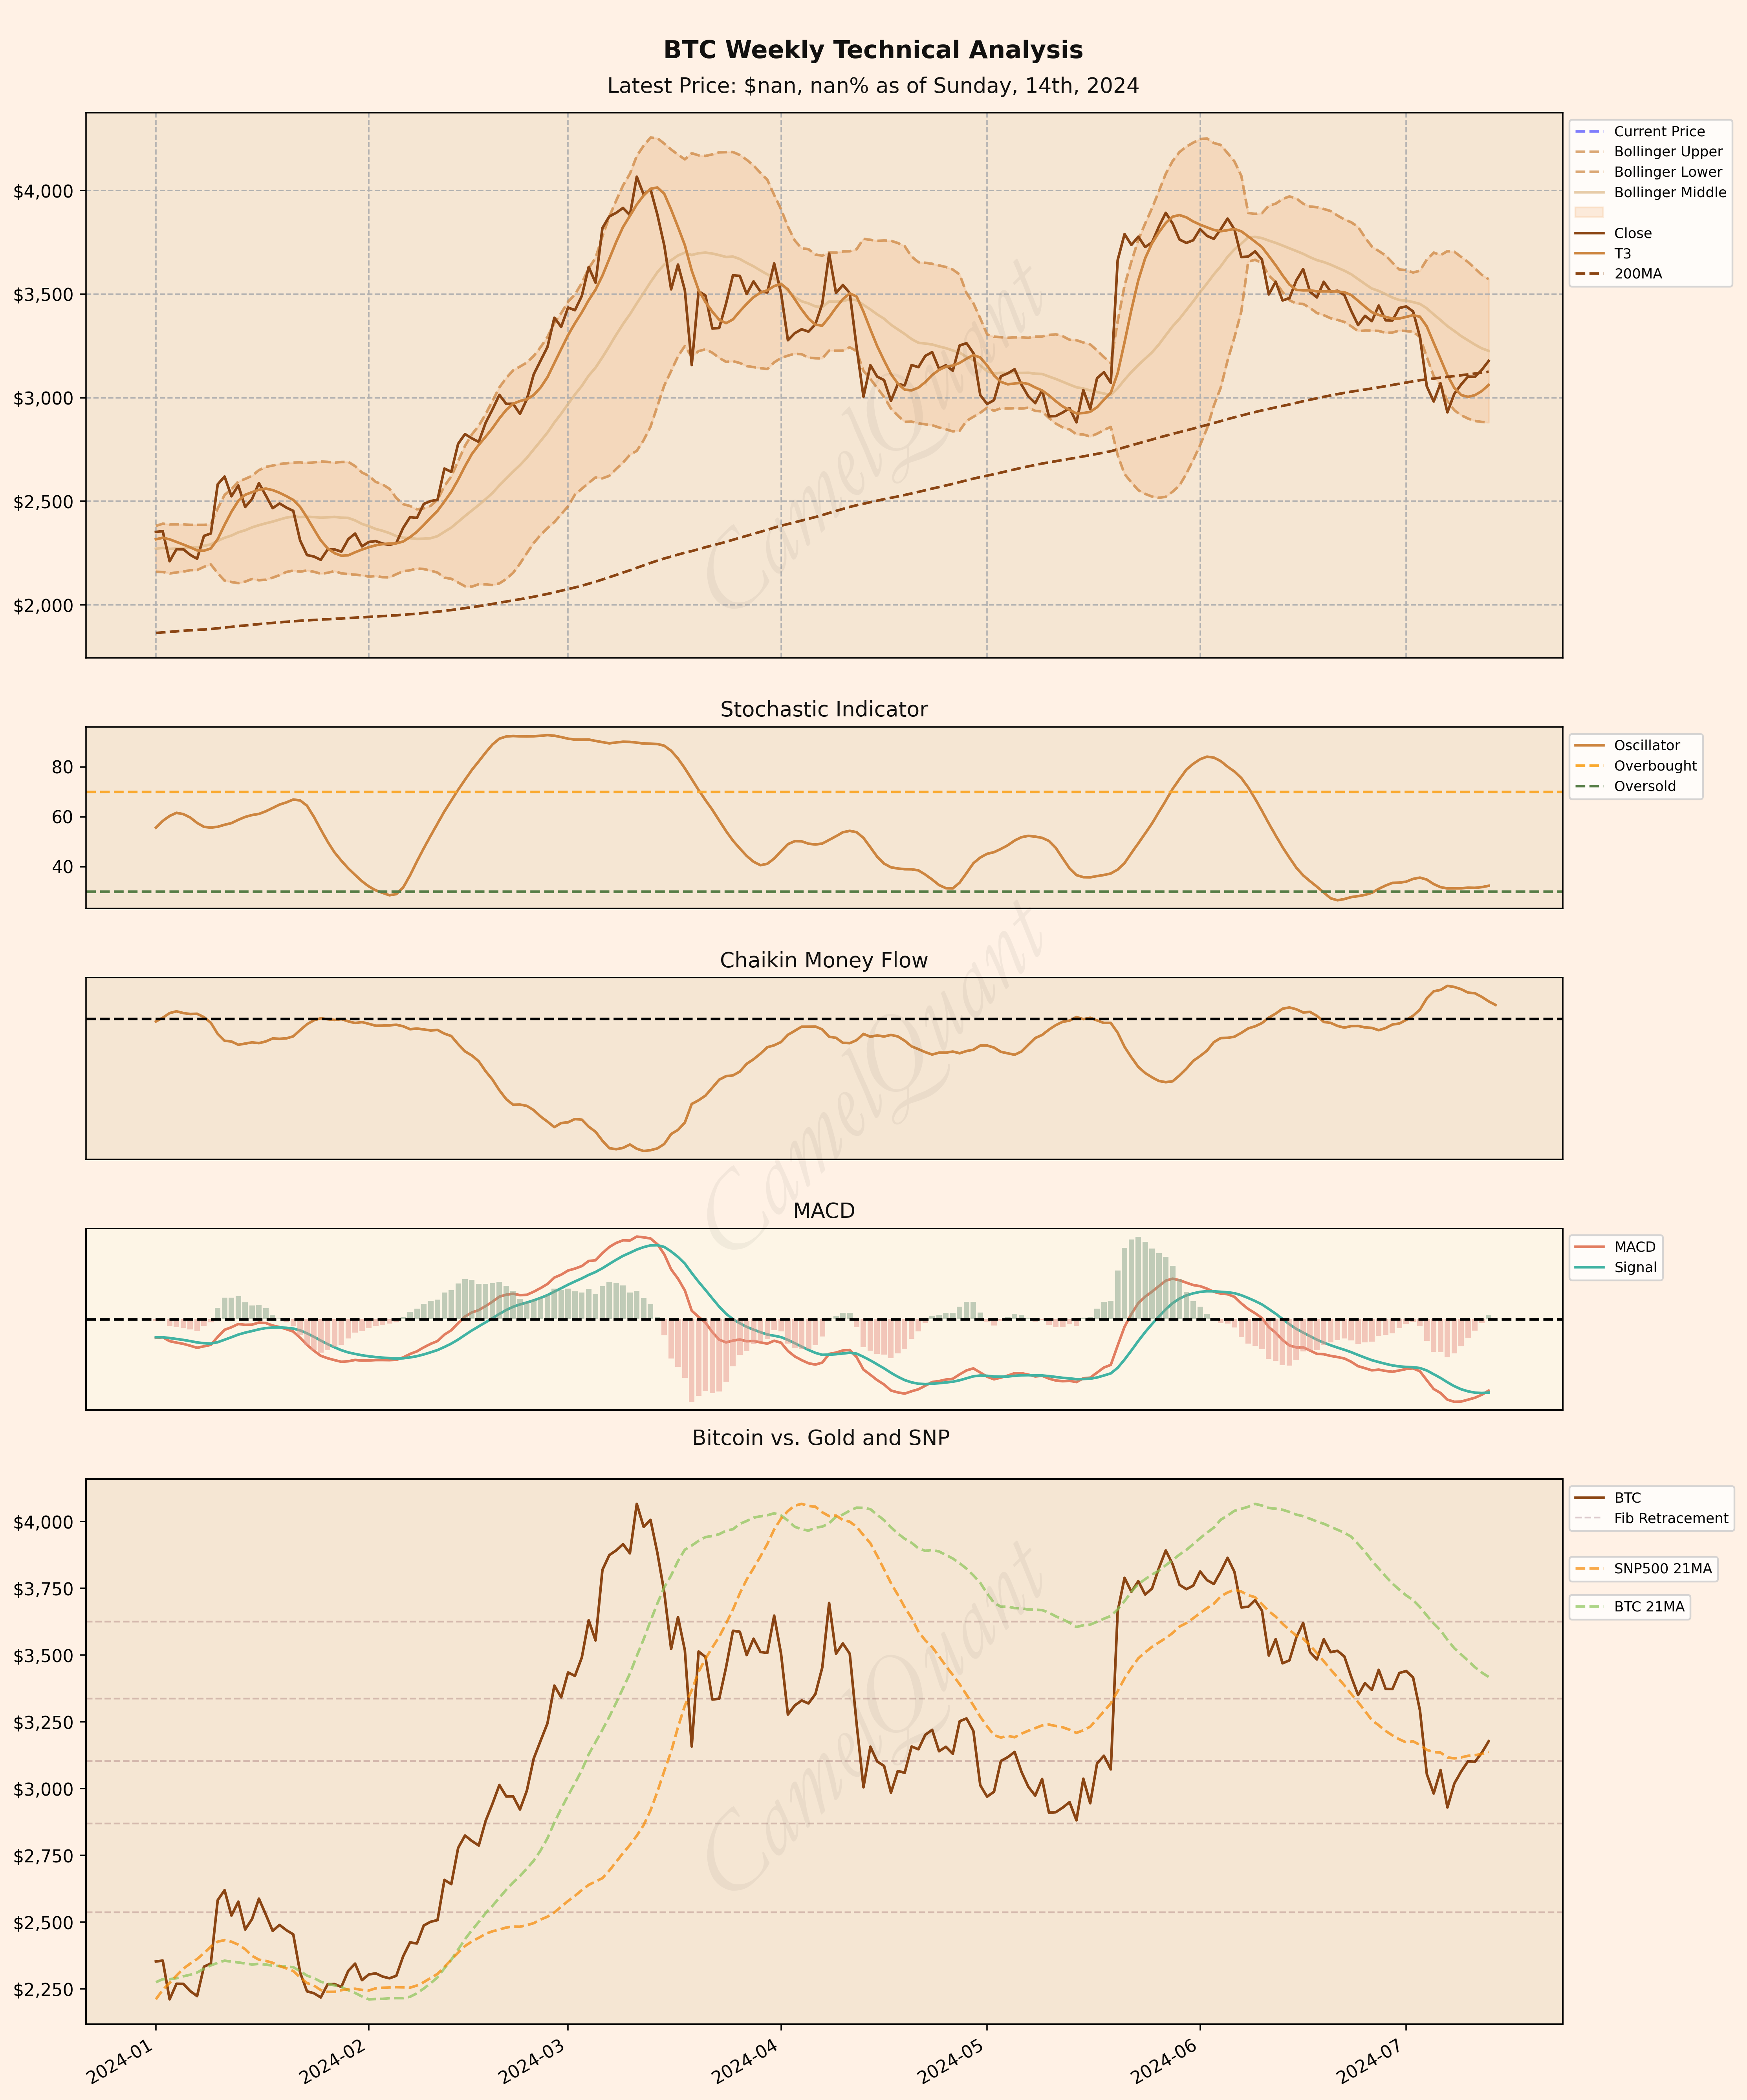

In [22]:
# Date range selection
btc_c = btc_ta[btc_ta.Date >= '2024-01-01'] #& (btc_ta.Date <= '2022-07-11')]
sol_c = sol_ta[sol_ta.Date >= '2024-01-01']
snp_c = snp_ta[snp_ta.Date >= '2024-01-01']
gold_c = gold_ta[gold_ta.Date >= '2024-01-01']
ada_c = ada_ta[ada_ta.Date >= '2024-01-01']
eth_c = eth_ta[eth_ta.Date >= '2024-01-01']

mods = {'MOD1': True, 'MOD2': True, 'MOD3': True, 'MOD4': True, 'MOD5': True}
ratioo = [3,1,1,1,3]
size = (14, 17)
dpi = 320

def plot_technical_analysis(main, comp1, comp2, levels, ratio, dpi, mods=None, figsize=(10, 12)):
    if mods is None:
        mods = {'MOD1': True, 'MOD2': True, 'MOD3': True, 'MOD4': True, 'MOD5': True}
    
    active_mods = sum(mods.values())
    # Define the formatter function
    def dollar_formatter(x, pos):
        return f'${x:,.0f}'
    # Function to add ordinal suffix to the day
    def ordinal_suffix(day):
        if 11 <= day <= 13:
            return f'{day}th'
        else:
            suffixes = {1: 'st', 2: 'nd', 3: 'rd'}
            return f'{day}{suffixes.get(day % 10, "th")}'

    # Prepare data
    latest_price = main.Close.iloc[-1]
    latest_date = main.Date.iloc[-1]
    latest_date_formatted = pd.to_datetime(latest_date)
    formatted_date = latest_date_formatted.strftime(f'%A, {ordinal_suffix(latest_date_formatted.day)}, %Y')
    pct_change = (main.Close.iloc[-1] / main.Close.iloc[-2]) -1

    main_title = '\n BTC Weekly Technical Analysis \n \n '
    subtitle = f'Latest Price: ${latest_price:,.2f}, {pct_change:.2%} as of {formatted_date}'

    # Create subplots
    fig, ax = plt.subplots(active_mods, 1, figsize=figsize, 
                           gridspec_kw={'height_ratios': ratio}, 
                           dpi=dpi, sharex=True)
    
    if active_mods == 1:
        ax = [ax]

    fig.suptitle(main_title, fontsize=14, color='#11100f', weight='bold')
    fig.text(0.5, 0.95, subtitle, fontsize=12, color='#11100f', ha='center', va='top')
    fig.autofmt_xdate()

    formatter = ticker.FuncFormatter(lambda x, p: format(int(x), ','))

    current_ax = 0

    if mods['MOD1']:
        # MOD 1: Current Price / Bollinger Bands, Closing Prices, T3
        ax[current_ax].axhline(y=main.Close.iloc[-1], color='blue', linestyle='--', alpha=0.5)
        ax[current_ax].plot(main.Date, main.bb_upper, color='#CD853F', linestyle='--', alpha=0.7, label='Upper BB')
        ax[current_ax].plot(main.Date, main.bb_lower, color='#CD853F', linestyle='--', alpha=0.7, label='Lower BB')
        ax[current_ax].plot(main.Date, main.bb_middle, color='#DEB887', linestyle='-', alpha=0.7, label='Middle BB')
        ax[current_ax].fill_between(main.Date, main.bb_upper, main.bb_lower, color='#F4A460', alpha=0.2)
        ax[current_ax].plot(main.Date, main.Close, color='#8B4513')
        ax[current_ax].plot(main.Date, main.t3, color='#CD853F')
        ax[current_ax].plot(main.Date, main['200MA'], color='#8B4513', linestyle='--')
        formatter = FuncFormatter(dollar_formatter) 
        ax[current_ax].yaxis.set_major_formatter(formatter)
        ax[current_ax].legend(['Current Price','Bollinger Upper', 'Bollinger Lower', 'Bollinger Middle','', 'Close', 'T3', '200MA'], fontsize=8, loc='upper left', bbox_to_anchor=(1, 1))
        ax[current_ax].grid(True, linestyle='--')
        ax[current_ax].set_facecolor('#F5E6D3')
        ax[current_ax].tick_params(axis='x', which='both', length=0)
        ax[current_ax].plot(main.Date.iloc[-1], main.Close.iloc[-1], marker='o', color='red')     
        current_ax += 1
        # Highlight the last point with a red dot
           

    if mods['MOD2']:
        # MOD 2: Stochastic Indicator
        ax[current_ax].plot(main.Date, main.Stochastic, color = '#CD853F')
        ax[current_ax].axhline(y=70, color='#FAA92F', linestyle='--')
        ax[current_ax].axhline(y=30, color='#567D46', linestyle='--')
        ax[current_ax].set_title('Stochastic Indicator', color='#11100f')
        ax[current_ax].set_facecolor('#F5E6D3')
        ax[current_ax].legend(['Oscillator','Overbought','Oversold'],fontsize=8, loc='upper left', bbox_to_anchor=(1, 1))
        ax[current_ax].tick_params(axis='x', which='both', length=0)
        current_ax += 1

    if mods['MOD3']:
        # MOD 3: Chaikin Money Flow
        ax[current_ax].plot(main.Date, main.CMF, color = '#CD853F')
        ax[current_ax].set_title('Chaikin Money Flow', color='#11100f')
        ax[current_ax].axhline(y=0, color='black', linestyle='--')
        ax[current_ax].set_facecolor('#F5E6D3')
        ax[current_ax].set_yticklabels([])
        ax[current_ax].tick_params(axis='y', which='both', length=0)
        ax[current_ax].tick_params(axis='x', which='both', length=0)
        current_ax += 1

    if mods['MOD4']:
        # MOD 4: MACD
        ax[current_ax].plot(main.Date, main.MACD, color='#E27D60', label='MACD')
        ax[current_ax].plot(main.Date, main.MACD_Signal, color='#41B3A3', label='Signal')
        colors = ['#85A389' if val >= 0 else '#E8998D' for val in main.MACD_Hist]
        ax3 = ax[current_ax].twinx()
        ax3.bar(main.Date, main.MACD_Hist, color=colors, label='Histogram', alpha=0.5)
        ax[current_ax].set_title('MACD', color='#11100f')
        ax[current_ax].set_facecolor('#FDF5E6')
        ax[current_ax].legend(fontsize=8, loc='upper left', bbox_to_anchor=(1, 1))
        ax3.axhline(y=0, color='black', linestyle='--')
        ax[current_ax].set_yticklabels([])
        ax[current_ax].tick_params(axis='y', which='both', length=0)
        ax[current_ax].tick_params(axis='x', which='both', length=0)
        ax3.set_yticklabels([])
        ax3.tick_params(axis='y', which='both', length=0)
        ax3.tick_params(axis='x', which='both', length=0)
        current_ax += 1

    if mods['MOD5']:
        # Plotting SOL vs. Other Prices
        ax[current_ax].plot(main.Date, main.Close, color='#8B4513')

        # Creating twin axes
        ax4 = ax[current_ax].twinx()
        ax41 = ax4.twinx()

        # Plotting moving averages on the twin axes
        ax4.plot(comp1.Date, comp1['21MA'], color='#8ac557', linestyle='--', alpha=0.7)
        ax41.plot(comp2.Date, comp2['21MA'], color='#f78800', linestyle='--', alpha=0.7)

        # Setting the title and subtitle
        ax[current_ax].set_title('Bitcoin vs. Gold and SNP \n', color='#11100f')
        #ax[current_ax].text(0.5, 1.05, 'Similarity in price movement', horizontalalignment='center', 
                            #verticalalignment='center', transform=ax[current_ax].transAxes, 
                            #color='#11100f', fontsize=8)

        # Customizing y-axis and x-axis ticks and labels for twin axes
        ax4.set_yticklabels([])
        ax4.tick_params(axis='y', which='both', length=0)
        ax4.tick_params(axis='x', which='both', length=0)
        ax41.set_yticklabels([])
        ax41.tick_params(axis='y', which='both', length=0)
        ax41.tick_params(axis='x', which='both', length=0)

        # Formatting the y-axis of the main plot
        # Apply the formatter to the y-axis
        formatter = FuncFormatter(dollar_formatter) 
        ax[current_ax].yaxis.set_major_formatter(formatter)

        # Adding horizontal lines for Fibonacci levels
        # Calculate the highest high and lowest low
        high = np.max(main.High)
        low = np.min(main.Low)

        # Calculate the Fibonacci retracement levels
        diff = high - low
        level_23_6 = high - diff * 0.236
        level_38_2 = high - diff * 0.382
        level_50 = high - diff * 0.5
        level_61_8 = high - diff * 0.618
        level_78_6 = high - diff * 0.786

        #make a list 
        levels = [level_23_6, level_38_2, level_50, level_61_8, level_78_6]
        
        for center in levels:
            ax[current_ax].axhline(y=center, color='#520018', linestyle='--', linewidth=1, alpha=0.2)

        # Adding legends
        ax[current_ax].legend(['BTC','Fib Retracement'], fontsize=8, loc='upper left', bbox_to_anchor=(1, 1))
        ax4.legend(['BTC 21MA'], fontsize=8, loc='upper left', bbox_to_anchor=(1, 0.8))
        ax41.legend(['SNP500 21MA','Gold Lag'], fontsize=8, loc='upper left', bbox_to_anchor=(1, 0.87))


        # Setting the face color of the main plot
        ax[current_ax].set_facecolor('#F5E6D3')

    # Add watermarks
    fig.text(0.5, 0.7, 'CamelQuant', ha='center',fontsize=60, color='#11100f', fontdict={'family': 'Garamond'}, rotation=45, alpha=0.05, style='italic', fontweight='bold')
    fig.text(0.5, 0.4, 'CamelQuant', ha='center',fontsize=60, color='#11100f', fontdict={'family': 'Garamond'}, rotation=45, alpha=0.05, style='italic', fontweight='bold')
    fig.text(0.5, 0.10, 'CamelQuant', ha='center',fontsize=60, color='#11100f', fontdict={'family': 'Garamond'}, rotation=45, alpha=0.05, style='italic', fontweight='bold')
    
    fig.set_facecolor('#fff1e5')
    plt.tight_layout()
    
    return fig, ax

fig, ax = plot_technical_analysis(eth_c, btc_c, sol_c, [0, 0.5, 1], mods=mods, figsize=(size), ratio = ratioo, dpi = dpi)
plt.show()


In [12]:
import datetime

def generate_report(btc_c, gold_c, snp_c, sol_c):
    report_template = """# Market Analysis Report: {date}

## Bitcoin (BTC)
Close: ${btc_close:.2f}
Daily Return: {btc_daily_return:.2f}%
7D Change: {btc_7d_change:.2f}%
30D Change: {btc_30d_change:.2f}%
Volume: {btc_volume:,.0f}
Volume Change : {btc_volume_change:.2f}%
Volume Change 7D: {btc_volume_change_7d:.2f}%

Technical Indicators:
BB: Upper ${btc_bb_upper:.2f} | Middle ${btc_bb_middle:.2f} | Lower ${btc_bb_lower:.2f}
SAR: ${btc_sar:.2f}
T3: ${btc_t3:.2f}
MA: 21 ${btc_21ma:.2f} | 200 ${btc_200ma:.2f}
RSI: {btc_rsi:.2f}
Stochastic: {btc_stoch:.2f}
CCI: {btc_cci:.2f}
MACD: {btc_macd:.2f} | Signal {btc_macd_signal:.2f} | Hist {btc_macd_hist:.2f}
ROC: {btc_roc:.2f}
OBV: {btc_obv:,.0f}
CMF: {btc_cmf:.4f}

## Gold
Close: ${gold_close:.2f}
Daily Return: {gold_daily_return:.2f}%
7D Change: {gold_7d_change:.2f}%
30D Change: {gold_30d_change:.2f}%
Volume: {gold_volume:,.0f}

Technical Indicators:
BB: Upper ${gold_bb_upper:.2f} | Middle ${gold_bb_middle:.2f} | Lower ${gold_bb_lower:.2f}
SAR: ${gold_sar:.2f}
T3: ${gold_t3:.2f}
MA: 21 ${gold_21ma:.2f} | 200 ${gold_200ma:.2f}
RSI: {gold_rsi:.2f}
Stochastic: {gold_stoch:.2f}
CCI: {gold_cci:.2f}
MACD: {gold_macd:.2f} | Signal {gold_macd_signal:.2f} | Hist {gold_macd_hist:.2f}
ROC: {gold_roc:.2f}
OBV: {gold_obv:,.0f}
CMF: {gold_cmf:.4f}

## S&P 500 (SNP)
Close: {snp_close:.2f}
Daily Return: {snp_daily_return:.2f}%
7D Change: {snp_7d_change:.2f}%
30D Change: {snp_30d_change:.2f}%
Volume: {snp_volume:,.0f}

Technical Indicators:
BB: Upper {snp_bb_upper:.2f} | Middle {snp_bb_middle:.2f} | Lower {snp_bb_lower:.2f}
SAR: {snp_sar:.2f}
T3: {snp_t3:.2f}
MA: 21 {snp_21ma:.2f} | 200 {snp_200ma:.2f}
RSI: {snp_rsi:.2f}
Stochastic: {snp_stoch:.2f}
CCI: {snp_cci:.2f}
MACD: {snp_macd:.2f} | Signal {snp_macd_signal:.2f} | Hist {snp_macd_hist:.2f}
ROC: {snp_roc:.2f}
OBV: {snp_obv:,.0f}
CMF: {snp_cmf:.4f}

## Solana (SOL)
Close: ${sol_close:.2f}
Daily Return: {sol_daily_return:.2f}%
7D Change: {sol_7d_change:.2f}%
30D Change: {sol_30d_change:.2f}%
Volume: {sol_volume:,.0f}

Technical Indicators:
BB: Upper ${sol_bb_upper:.2f} | Middle ${sol_bb_middle:.2f} | Lower ${sol_bb_lower:.2f}
SAR: ${sol_sar:.2f}
T3: ${sol_t3:.2f}
MA: 21 ${sol_21ma:.2f} | 200 ${sol_200ma:.2f}
RSI: {sol_rsi:.2f}
Stochastic: {sol_stoch:.2f}
CCI: {sol_cci:.2f}
MACD: {sol_macd:.2f} | Signal {sol_macd_signal:.2f} | Hist {sol_macd_hist:.2f}
ROC: {sol_roc:.2f}
OBV: {sol_obv:,.0f}
CMF: {sol_cmf:.4f}

Analysis:
{analysis}

Key Takeaways:
1. {key_takeaway_1}
2. {key_takeaway_2}
3. {key_takeaway_3}

Potential Tweet Ideas:
1. {tweet_idea_1}
2. {tweet_idea_2}
3. {tweet_idea_3}
"""

    report_data = {
        'date': datetime.date.today().strftime("%Y-%m-%d"),
        'btc_close': btc_c.Close.iloc[-1],
        'btc_daily_return': btc_c.Returns.iloc[-1] * 100,
        'btc_7d_change': ((btc_c.Close.iloc[-1] / btc_c.Close.iloc[-7]) - 1) * 100,
        'btc_30d_change': ((btc_c.Close.iloc[-1] / btc_c.Close.iloc[-30]) - 1) * 100,
        'btc_volume': btc_c.Volume.iloc[-1],

        'btc_volume_change': ((btc_c.Volume.iloc[-1] / btc_c.Volume.iloc[-2]) - 1) * 100,

        'btc_volume_change_7d' : ((btc_c.Volume.iloc[-8:-1].mean() / btc_c.Volume.iloc[-15:-8].mean()) - 1) * 100,  


        'btc_bb_upper': btc_c.bb_upper.iloc[-1],
        'btc_bb_middle': btc_c.bb_middle.iloc[-1],
        'btc_bb_lower': btc_c.bb_lower.iloc[-1],
        'btc_sar': btc_c.SAR.iloc[-1],
        'btc_t3': btc_c.t3.iloc[-1],
        'btc_21ma': btc_c['21MA'].iloc[-1],
        'btc_200ma': btc_c['200MA'].iloc[-1],
        'btc_rsi': btc_c.RSI.iloc[-1],
        'btc_stoch': btc_c.Stochastic.iloc[-1],
        'btc_cci': btc_c.CCI.iloc[-1],
        'btc_macd': btc_c.MACD.iloc[-1],
        'btc_macd_signal': btc_c.MACD_Signal.iloc[-1],
        'btc_macd_hist': btc_c.MACD_Hist.iloc[-1],
        'btc_roc': btc_c.ROC.iloc[-1],
        'btc_obv': btc_c.OBV.iloc[-1],
        'btc_cmf': btc_c.CMF.iloc[-1],
        
        'gold_close': gold_c.Close.iloc[-1],
        'gold_daily_return': gold_c.Returns.iloc[-1] * 100,
        'gold_7d_change': ((gold_c.Close.iloc[-1] / gold_c.Close.iloc[-7]) - 1) * 100,
        'gold_30d_change': ((gold_c.Close.iloc[-1] / gold_c.Close.iloc[-30]) - 1) * 100,
        'gold_volume': gold_c.Volume.iloc[-1],
        'gold_bb_upper': gold_c.bb_upper.iloc[-1],
        'gold_bb_middle': gold_c.bb_middle.iloc[-1],
        'gold_bb_lower': gold_c.bb_lower.iloc[-1],
        'gold_sar': gold_c.SAR.iloc[-1],
        'gold_t3': gold_c.t3.iloc[-1],
        'gold_21ma': gold_c['21MA'].iloc[-1],
        'gold_200ma': gold_c['200MA'].iloc[-1],
        'gold_rsi': gold_c.RSI.iloc[-1],
        'gold_stoch': gold_c.Stochastic.iloc[-1],
        'gold_cci': gold_c.CCI.iloc[-1],
        'gold_macd': gold_c.MACD.iloc[-1],
        'gold_macd_signal': gold_c.MACD_Signal.iloc[-1],
        'gold_macd_hist': gold_c.MACD_Hist.iloc[-1],
        'gold_roc': gold_c.ROC.iloc[-1],
        'gold_obv': gold_c.OBV.iloc[-1],
        'gold_cmf': gold_c.CMF.iloc[-1],
        
        'snp_close': snp_c.Close.iloc[-1],
        'snp_daily_return': snp_c.Returns.iloc[-1] * 100,
        'snp_7d_change': ((snp_c.Close.iloc[-1] / snp_c.Close.iloc[-7]) - 1) * 100,
        'snp_30d_change': ((snp_c.Close.iloc[-1] / snp_c.Close.iloc[-30]) - 1) * 100,
        'snp_volume': snp_c.Volume.iloc[-1],
        'snp_bb_upper': snp_c.bb_upper.iloc[-1],
        'snp_bb_middle': snp_c.bb_middle.iloc[-1],
        'snp_bb_lower': snp_c.bb_lower.iloc[-1],
        'snp_sar': snp_c.SAR.iloc[-1],
        'snp_t3': snp_c.t3.iloc[-1],
        'snp_21ma': snp_c['21MA'].iloc[-1],
        'snp_200ma': snp_c['200MA'].iloc[-1],
        'snp_rsi': snp_c.RSI.iloc[-1],
        'snp_stoch': snp_c.Stochastic.iloc[-1],
        'snp_cci': snp_c.CCI.iloc[-1],
        'snp_macd': snp_c.MACD.iloc[-1],
        'snp_macd_signal': snp_c.MACD_Signal.iloc[-1],
        'snp_macd_hist': snp_c.MACD_Hist.iloc[-1],
        'snp_roc': snp_c.ROC.iloc[-1],
        'snp_obv': snp_c.OBV.iloc[-1],
        'snp_cmf': snp_c.CMF.iloc[-1],
        
        'sol_close': sol_c.Close.iloc[-1],
        'sol_daily_return': sol_c.Returns.iloc[-1] * 100,
        'sol_7d_change': ((sol_c.Close.iloc[-1] / sol_c.Close.iloc[-7]) - 1) * 100,
        'sol_30d_change': ((sol_c.Close.iloc[-1] / sol_c.Close.iloc[-30]) - 1) * 100,
        'sol_volume': sol_c.Volume.iloc[-1],
        'sol_bb_upper': sol_c.bb_upper.iloc[-1],
        'sol_bb_middle': sol_c.bb_middle.iloc[-1],
        'sol_bb_lower': sol_c.bb_lower.iloc[-1],
        'sol_sar': sol_c.SAR.iloc[-1],
        'sol_t3': sol_c.t3.iloc[-1],
        'sol_21ma': sol_c['21MA'].iloc[-1],
        'sol_200ma': sol_c['200MA'].iloc[-1],
        'sol_rsi': sol_c.RSI.iloc[-1],
        'sol_stoch': sol_c.Stochastic.iloc[-1],
        'sol_cci': sol_c.CCI.iloc[-1],
        'sol_macd': sol_c.MACD.iloc[-1],
        'sol_macd_signal': sol_c.MACD_Signal.iloc[-1],
        'sol_macd_hist': sol_c.MACD_Hist.iloc[-1],
        'sol_roc': sol_c.ROC.iloc[-1],
        'sol_obv': sol_c.OBV.iloc[-1],
        'sol_cmf': sol_c.CMF.iloc[-1],
        
        'analysis': "Insert your analysis here.",
        'key_takeaway_1': "First key takeaway",
        'key_takeaway_2': "Second key takeaway",
        'key_takeaway_3': "Third key takeaway",
        'tweet_idea_1': "First tweet idea",
        'tweet_idea_2': "Second tweet idea",
        'tweet_idea_3': "Third tweet idea"
    }

    return report_template.format(**report_data)

# Usage
# Assuming btc_c, gold_c, snp_c, and sol_c are your dataframes
report = generate_report(btc_c, gold_c, snp_c, sol_c)
print(report)

# Market Analysis Report: 2024-07-14

## Bitcoin (BTC)
Close: $59231.95
Daily Return: 2.30%
7D Change: 6.06%
30D Change: -10.27%
Volume: 17,080,061,806
Volume Change : -33.29%
Volume Change 7D: -6.27%

Technical Indicators:
BB: Upper $63703.75 | Middle $59408.24 | Lower $55112.73
SAR: $60873.46
T3: $57318.40
MA: 21 $59587.88 | 200 $59123.74
RSI: 45.27
Stochastic: 34.08
CCI: 5.82
MACD: -1847.56 | Signal -2032.26 | Hist 184.70
ROC: -5.76
OBV: 1,311,974,331,170
CMF: 13970251161.8857

## Gold
Close: $2414.00
Daily Return: -0.04%
7D Change: 1.07%
30D Change: 4.95%
Volume: 72

Technical Indicators:
BB: Upper $2417.67 | Middle $2351.10 | Lower $2284.53
SAR: $2316.55
T3: $2388.18
MA: 21 $2349.45 | 200 $2211.65
RSI: 66.56
Stochastic: 76.88
CCI: 139.49
MACD: 17.95 | Signal 11.15 | Hist 6.81
ROC: 3.71
OBV: 534,564
CMF: -550.8753

## S&P 500 (SNP)
Close: 5615.35
Daily Return: 0.55%
7D Change: 0.87%
30D Change: 3.34%
Volume: 3,700,280,000

Technical Indicators:
BB: Upper 5638.31 | Middle 5523.37 | 

In [32]:
import datetime

def generate_indicator_signals(df):
    signals = {
        'bb_signal': "Hold",
        'sar_signal': "Hold",
        't3_signal': "Hold",
        'ma_signal': "Hold",
        'rsi_signal': "Hold",
        'stoch_signal': "Hold",
        'cci_signal': "Hold",
        'macd_signal': "Hold",
        'roc_signal': "Hold",
        'obv_signal': "Hold",
        'cmf_signal': "Hold"
    }

    # Bollinger Bands signals
    if df['Close'].iloc[-1] > df['bb_upper'].iloc[-1]:
        signals['bb_signal'] = "Sell"
    elif df['Close'].iloc[-1] < df['bb_lower'].iloc[-1]:
        signals['bb_signal'] = "Buy"

    # Parabolic SAR signals
    if df['Close'].iloc[-1] > df['SAR'].iloc[-1]:
        signals['sar_signal'] = "Buy"
    elif df['Close'].iloc[-1] < df['SAR'].iloc[-1]:
        signals['sar_signal'] = "Sell"

    # Triple Exponential Moving Average (T3) signals
    if df['Close'].iloc[-1] > df['t3'].iloc[-1]:
        signals['t3_signal'] = "Buy"
    elif df['Close'].iloc[-1] < df['t3'].iloc[-1]:
        signals['t3_signal'] = "Sell"

    # Moving Averages (21MA, 200MA) signals
    if df['21MA'].iloc[-1] > df['200MA'].iloc[-1]:
        signals['ma_signal'] = "Buy"
    elif df['21MA'].iloc[-1] < df['200MA'].iloc[-1]:
        signals['ma_signal'] = "Sell"

    # RSI signals
    if df['RSI'].iloc[-1] > 70:
        signals['rsi_signal'] = "Sell"
    elif df['RSI'].iloc[-1] < 30:
        signals['rsi_signal'] = "Buy"

    # Stochastic Oscillator signals
    if df['Stochastic'].iloc[-1] > 80:
        signals['stoch_signal'] = "Sell"
    elif df['Stochastic'].iloc[-1] < 20:
        signals['stoch_signal'] = "Buy"

    # Commodity Channel Index (CCI) signals
    if df['CCI'].iloc[-1] > 100:
        signals['cci_signal'] = "Sell"
    elif df['CCI'].iloc[-1] < -100:
        signals['cci_signal'] = "Buy"

    # MACD signals
    if df['MACD'].iloc[-1] > df['MACD_Signal'].iloc[-1]:
        signals['macd_signal'] = "Buy"
    elif df['MACD'].iloc[-1] < df['MACD_Signal'].iloc[-1]:
        signals['macd_signal'] = "Sell"

    # Rate of Change (ROC) signals
    if df['ROC'].iloc[-1] > 0:
        signals['roc_signal'] = "Buy"
    elif df['ROC'].iloc[-1] < 0:
        signals['roc_signal'] = "Sell"

    # On-Balance Volume (OBV) signals
    # Assuming upward trend in OBV is buy, downward is sell
    if df['OBV'].diff().iloc[-1] > 0:
        signals['obv_signal'] = "Buy"
    elif df['OBV'].diff().iloc[-1] < 0:
        signals['obv_signal'] = "Sell"

    # Chaikin Money Flow (CMF) signals
    if df['CMF'].iloc[-1] > 0:
        signals['cmf_signal'] = "Buy"
    elif df['CMF'].iloc[-1] < 0:
        signals['cmf_signal'] = "Sell"

    return signals

def generate_report(btc_c, gold_c, snp_c, sol_c):
    # Generate signals for each data frame
    btc_signals = generate_indicator_signals(btc_c)
    gold_signals = generate_indicator_signals(gold_c)
    snp_signals = generate_indicator_signals(snp_c)
    sol_signals = generate_indicator_signals(sol_c)

    report_template = """# Market Analysis Report: {date}

## Bitcoin (BTC)
Close: ${btc_close:.2f}
Daily Return: {btc_daily_return:.2f}%
7D Change: {btc_7d_change:.2f}%
30D Change: {btc_30d_change:.2f}%
Volume: {btc_volume:,.0f}

Technical Indicators:
BB: Upper ${btc_bb_upper:.2f} | Middle ${btc_bb_middle:.2f} | Lower ${btc_bb_lower:.2f} ({bb_signal})
SAR: ${btc_sar:.2f} ({sar_signal})
T3: ${btc_t3:.2f} ({t3_signal})
MA: 21 ${btc_21ma:.2f} | 200 ${btc_200ma:.2f} ({ma_signal})
RSI: {btc_rsi:.2f} ({rsi_signal})
Stochastic: {btc_stoch:.2f} ({stoch_signal})
CCI: {btc_cci:.2f} ({cci_signal})
MACD: {btc_macd:.2f} | Signal {btc_macd_signal:.2f} | Hist {btc_macd_hist:.2f} ({macd_signal})
ROC: {btc_roc:.2f} ({roc_signal})
OBV: {btc_obv:,.0f} ({obv_signal})
CMF: {btc_cmf:.4f} ({cmf_signal})

## Gold
Close: ${gold_close:.2f}
Daily Return: {gold_daily_return:.2f}%
7D Change: {gold_7d_change:.2f}%
30D Change: {gold_30d_change:.2f}%
Volume: {gold_volume:,.0f}

Technical Indicators:
BB: Upper ${gold_bb_upper:.2f} | Middle ${gold_bb_middle:.2f} | Lower ${gold_bb_lower:.2f} ({gold_bb_signal})
SAR: ${gold_sar:.2f} ({gold_sar_signal})
T3: ${gold_t3:.2f} ({gold_t3_signal})
MA: 21 ${gold_21ma:.2f} | 200 ${gold_200ma:.2f} ({gold_ma_signal})
RSI: {gold_rsi:.2f} ({gold_rsi_signal})
Stochastic: {gold_stoch:.2f} ({gold_stoch_signal})
CCI: {gold_cci:.2f} ({gold_cci_signal})
MACD: {gold_macd:.2f} | Signal {gold_macd_signal:.2f} | Hist {gold_macd_hist:.2f} ({gold_macd_signal})
ROC: {gold_roc:.2f} ({gold_roc_signal})
OBV: {gold_obv:,.0f} ({gold_obv_signal})
CMF: {gold_cmf:.4f} ({gold_cmf_signal})

## S&P 500 (SNP)
Close: {snp_close:.2f}
Daily Return: {snp_daily_return:.2f}%
7D Change: {snp_7d_change:.2f}%
30D Change: {snp_30d_change:.2f}%
Volume: {snp_volume:,.0f}

Technical Indicators:
BB: Upper {snp_bb_upper:.2f} | Middle {snp_bb_middle:.2f} | Lower {snp_bb_lower:.2f} ({snp_bb_signal})
SAR: {snp_sar:.2f} ({snp_sar_signal})
T3: {snp_t3:.2f} ({snp_t3_signal})
MA: 21 {snp_21ma:.2f} | 200 {snp_200ma:.2f} ({snp_ma_signal})
RSI: {snp_rsi:.2f} ({snp_rsi_signal})
Stochastic: {snp_stoch:.2f} ({snp_stoch_signal})
CCI: {snp_cci:.2f} ({snp_cci_signal})
MACD: {snp_macd:.2f} | Signal {snp_macd_signal:.2f} | Hist {snp_macd_hist:.2f} ({snp_macd_signal})
ROC: {snp_roc:.2f} ({snp_roc_signal})
OBV: {snp_obv:,.0f} ({snp_obv_signal})
CMF: {snp_cmf:.4f} ({snp_cmf_signal})

## Solana (SOL)
Close: ${sol_close:.2f}
Daily Return: {sol_daily_return:.2f}%
7D Change: {sol_7d_change:.2f}%
30D Change: {sol_30d_change:.2f}%
Volume: {sol_volume:,.0f}

Technical Indicators:
BB: Upper ${sol_bb_upper:.2f} | Middle ${sol_bb_middle:.2f} | Lower ${sol_bb_lower:.2f} ({sol_bb_signal})
SAR: ${sol_sar:.2f} ({sol_sar_signal})
T3: ${sol_t3:.2f} ({sol_t3_signal})
MA: 21 ${sol_21ma:.2f} | 200 ${sol_200ma:.2f} ({sol_ma_signal})
RSI: {sol_rsi:.2f} ({sol_rsi_signal})
Stochastic: {sol_stoch:.2f} ({sol_stoch_signal})
CCI: {sol_cci:.2f} ({sol_cci_signal})
MACD: {sol_macd:.2f} | Signal {sol_macd_signal:.2f} | Hist {sol_macd_hist:.2f} ({sol_macd_signal})
ROC: {sol_roc:.2f} ({sol_roc_signal})
OBV: {sol_obv:,.0f} ({sol_obv_signal})
CMF: {sol_cmf:.4f} ({sol_cmf_signal})

Analysis:
{analysis}

Key Takeaways:
1. {key_takeaway_1}
2. {key_takeaway_2}
3. {key_takeaway_3}

Potential Tweet Ideas:
1. {tweet_idea_1}
2. {tweet_idea_2}
3. {tweet_idea_3}
"""

    report_data = {
        'date': datetime.date.today().strftime("%Y-%m-%d"),
        'btc_close': btc_c.Close.iloc[-1],
        'btc_daily_return': btc_c.Returns.iloc[-1] * 100,
        'btc_7d_change': ((btc_c.Close.iloc[-1] / btc_c.Close.iloc[-7]) - 1) * 100,
        'btc_30d_change': ((btc_c.Close.iloc[-1] / btc_c.Close.iloc[-30]) - 1) * 100,
        'btc_volume': btc_c.Volume.iloc[-1],
        'btc_bb_upper': btc_c.bb_upper.iloc[-1],
        'btc_bb_middle': btc_c.bb_middle.iloc[-1],
        'btc_bb_lower': btc_c.bb_lower.iloc[-1],
        'btc_sar': btc_c.SAR.iloc[-1],
        'btc_t3': btc_c.t3.iloc[-1],
        'btc_21ma': btc_c['21MA'].iloc[-1],
        'btc_200ma': btc_c['200MA'].iloc[-1],
        'btc_rsi': btc_c.RSI.iloc[-1],
        'btc_stoch': btc_c.Stochastic.iloc[-1],
        'btc_cci': btc_c.CCI.iloc[-1],
        'btc_macd': btc_c.MACD.iloc[-1],
        'btc_macd_signal': btc_c.MACD_Signal.iloc[-1],
        'btc_macd_hist': btc_c.MACD_Hist.iloc[-1],
        'btc_roc': btc_c.ROC.iloc[-1],
        'btc_obv': btc_c.OBV.iloc[-1],
        'btc_cmf': btc_c.CMF.iloc[-1],
        **btc_signals,
        'gold_close': gold_c.Close.iloc[-1],
        'gold_daily_return': gold_c.Returns.iloc[-1] * 100,
        'gold_7d_change': ((gold_c.Close.iloc[-1] / gold_c.Close.iloc[-7]) - 1) * 100,
        'gold_30d_change': ((gold_c.Close.iloc[-1] / gold_c.Close.iloc[-30]) - 1) * 100,
        'gold_volume': gold_c.Volume.iloc[-1],
        'gold_bb_upper': gold_c.bb_upper.iloc[-1],
        'gold_bb_middle': gold_c.bb_middle.iloc[-1],
        'gold_bb_lower': gold_c.bb_lower.iloc[-1],
        'gold_sar': gold_c.SAR.iloc[-1],
        'gold_t3': gold_c.t3.iloc[-1],
        'gold_21ma': gold_c['21MA'].iloc[-1],
        'gold_200ma': gold_c['200MA'].iloc[-1],
        'gold_rsi': gold_c.RSI.iloc[-1],
        'gold_stoch': gold_c.Stochastic.iloc[-1],
        'gold_cci': gold_c.CCI.iloc[-1],
        'gold_macd': gold_c.MACD.iloc[-1],
        'gold_macd_signal': gold_c.MACD_Signal.iloc[-1],
        'gold_macd_hist': gold_c.MACD_Hist.iloc[-1],
        'gold_roc': gold_c.ROC.iloc[-1],
        'gold_obv': gold_c.OBV.iloc[-1],
        'gold_cmf': gold_c.CMF.iloc[-1],
        **gold_signals,
        'snp_close': snp_c.Close.iloc[-1],
        'snp_daily_return': snp_c.Returns.iloc[-1] * 100,
        'snp_7d_change': ((snp_c.Close.iloc[-1] / snp_c.Close.iloc[-7]) - 1) * 100,
        'snp_30d_change': ((snp_c.Close.iloc[-1] / snp_c.Close.iloc[-30]) - 1) * 100,
        'snp_volume': snp_c.Volume.iloc[-1],
        'snp_bb_upper': snp_c.bb_upper.iloc[-1],
        'snp_bb_middle': snp_c.bb_middle.iloc[-1],
        'snp_bb_lower': snp_c.bb_lower.iloc[-1],
        'snp_sar': snp_c.SAR.iloc[-1],
        'snp_t3': snp_c.t3.iloc[-1],
        'snp_21ma': snp_c['21MA'].iloc[-1],
        'snp_200ma': snp_c['200MA'].iloc[-1],
        'snp_rsi': snp_c.RSI.iloc[-1],
        'snp_stoch': snp_c.Stochastic.iloc[-1],
        'snp_cci': snp_c.CCI.iloc[-1],
        'snp_macd': snp_c.MACD.iloc[-1],
        'snp_macd_signal': snp_c.MACD_Signal.iloc[-1],
        'snp_macd_hist': snp_c.MACD_Hist.iloc[-1],
        'snp_roc': snp_c.ROC.iloc[-1],
        'snp_obv': snp_c.OBV.iloc[-1],
        'snp_cmf': snp_c.CMF.iloc[-1],
        **snp_signals,
        'sol_close': sol_c.Close.iloc[-1],
        'sol_daily_return': sol_c.Returns.iloc[-1] * 100,
        'sol_7d_change': ((sol_c.Close.iloc[-1] / sol_c.Close.iloc[-7]) - 1) * 100,
        'sol_30d_change': ((sol_c.Close.iloc[-1] / sol_c.Close.iloc[-30]) - 1) * 100,
        'sol_volume': sol_c.Volume.iloc[-1],
        'sol_bb_upper': sol_c.bb_upper.iloc[-1],
        'sol_bb_middle': sol_c.bb_middle.iloc[-1],
        'sol_bb_lower': sol_c.bb_lower.iloc[-1],
        'sol_sar': sol_c.SAR.iloc[-1],
        'sol_t3': sol_c.t3.iloc[-1],
        'sol_21ma': sol_c['21MA'].iloc[-1],
        'sol_200ma': sol_c['200MA'].iloc[-1],
        'sol_rsi': sol_c.RSI.iloc[-1],
        'sol_stoch': sol_c.Stochastic.iloc[-1],
        'sol_cci': sol_c.CCI.iloc[-1],
        'sol_macd': sol_c.MACD.iloc[-1],
        'sol_macd_signal': sol_c.MACD_Signal.iloc[-1],
        'sol_macd_hist': sol_c.MACD_Hist.iloc[-1],
        'sol_roc': sol_c.ROC.iloc[-1],
        'sol_obv': sol_c.OBV.iloc[-1],
        'sol_cmf': sol_c.CMF.iloc[-1],
        **sol_signals,
        'analysis': "Insert your analysis here.",
        'key_takeaway_1': "First key takeaway",
        'key_takeaway_2': "Second key takeaway",
        'key_takeaway_3': "Third key takeaway",
        'tweet_idea_1': "First tweet idea",
        'tweet_idea_2': "Second tweet idea",
        'tweet_idea_3': "Third tweet idea"
    }

    return report_template.format(**report_data)

# Usage
# Assuming btc_c, gold_c, snp_c, and sol_c are your dataframes with necessary columns
report = generate_report(btc_c, gold_c, snp_c, sol_c)
print(report)


KeyError: 'gold_bb_signal'

In [25]:
btc_c.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Returns', 'bb_upper',
       'bb_middle', 'bb_lower', 'SAR', 't3', '21MA', '200MA', 'RSI',
       'Stochastic', 'CCI', 'MACD', 'MACD_Signal', 'MACD_Hist', 'ROC', 'OBV',
       'CMF'],
      dtype='object')

### Help

In [ ]:
EMA(btc_f.Volume, 20)

plt.tight_layout()

In [53]:
ta.get_functions()

['HT_DCPERIOD',
 'HT_DCPHASE',
 'HT_PHASOR',
 'HT_SINE',
 'HT_TRENDMODE',
 'ADD',
 'DIV',
 'MAX',
 'MAXINDEX',
 'MIN',
 'MININDEX',
 'MINMAX',
 'MINMAXINDEX',
 'MULT',
 'SUB',
 'SUM',
 'ACOS',
 'ASIN',
 'ATAN',
 'CEIL',
 'COS',
 'COSH',
 'EXP',
 'FLOOR',
 'LN',
 'LOG10',
 'SIN',
 'SINH',
 'SQRT',
 'TAN',
 'TANH',
 'ADX',
 'ADXR',
 'APO',
 'AROON',
 'AROONOSC',
 'BOP',
 'CCI',
 'CMO',
 'DX',
 'MACD',
 'MACDEXT',
 'MACDFIX',
 'MFI',
 'MINUS_DI',
 'MINUS_DM',
 'MOM',
 'PLUS_DI',
 'PLUS_DM',
 'PPO',
 'ROC',
 'ROCP',
 'ROCR',
 'ROCR100',
 'RSI',
 'STOCH',
 'STOCHF',
 'STOCHRSI',
 'TRIX',
 'ULTOSC',
 'WILLR',
 'BBANDS',
 'DEMA',
 'EMA',
 'HT_TRENDLINE',
 'KAMA',
 'MA',
 'MAMA',
 'MAVP',
 'MIDPOINT',
 'MIDPRICE',
 'SAR',
 'SAREXT',
 'SMA',
 'T3',
 'TEMA',
 'TRIMA',
 'WMA',
 'CDL2CROWS',
 'CDL3BLACKCROWS',
 'CDL3INSIDE',
 'CDL3LINESTRIKE',
 'CDL3OUTSIDE',
 'CDL3STARSINSOUTH',
 'CDL3WHITESOLDIERS',
 'CDLABANDONEDBABY',
 'CDLADVANCEBLOCK',
 'CDLBELTHOLD',
 'CDLBREAKAWAY',
 'CDLCLOSINGMARUBOZU',


In [15]:
?ta.STOCHF

Signature:
ta.STOCHF(
    high,
    low,
    close,
    fastk_period=-2147483648,
    fastd_period=-2147483648,
    fastd_matype=0,
)
Docstring:
STOCHF(high, low, close[, fastk_period=?, fastd_period=?, fastd_matype=?])

Stochastic Fast (Momentum Indicators)

Inputs:
    prices: ['high', 'low', 'close']
Parameters:
    fastk_period: 5
    fastd_period: 3
    fastd_matype: 0
Outputs:
    fastk
    fastd
Type:      function